In [1]:
import os
import pandas as pd
import numpy as np 
#import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
from pypalettes import load_cmap
cmap = load_cmap("X77")

ValueError: Palette with name 'X77_r' not found. Did you mean: 'X77'?
See available palettes at https://python-graph-gallery.com/color-palette-finder/

In [2]:
from operator import mul

def time_tomin(my_time):
    factors = (60, 1, 1/60)
    t1 = sum(i*j for i, j in zip(map(int, my_time.split(':')), factors))
    t2 = sum(map(mul, map(int, my_time.split(':')), factors))
    return t2

def heat_plot(corr):
    fig = go.Figure(data=go.Heatmap(
                   z=corr,
                   x=corr.index,
                   y=corr.columns,
                   hoverongaps = False, colorbar=dict(tickvals=[-1,-0.5, -0.25,0,0.25, 0.5, 0.75, 1])))
    return fig

In [51]:
dirpath = os.getcwd()
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"
plot_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),r"adsa\examples")

# read features
features_df = pd.read_csv(features_path)
data_df2 = pd.read_csv(r"C:\Users\marie\rep_codes\udder_project\delpro_vms\milk_videos_filtered.csv")[["cow", "interval"]].dropna()
data_df2["interval"] = [time_tomin(data_df2.loc[i, "interval"]) for i in range(len(data_df2))]

In [4]:
data_df = pd.read_csv(os.path.join(data_path, "yield_integrated.csv"))

vars_x = ["udder_area", "udder_sarea", "udder_peri", "front_eu", "back_eu", "udder_vol"]
vars_y = ["vyield_udder_7d", "dim"]

dfx = features_df[["cow"] +vars_x]
dfy = data_df[["cow"] + vars_y]
dfy = dfy.merge(data_df2, on = "cow")
merged = dfx.merge(dfy, on = "cow")

In [5]:
corr = merged.drop("cow", axis = 1).corr(method = 'pearson')


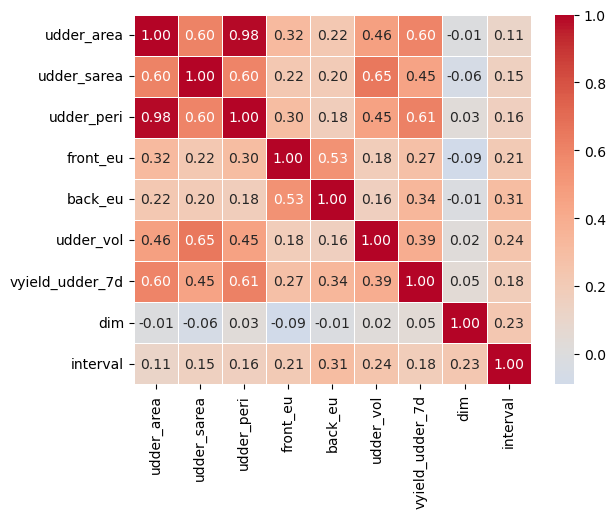

In [10]:
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5, center= 0, cmap= cmap)
plt.show()

In [36]:
new_names = {"udder_area": "udder area", "udder_sarea": "udder\nsurface area", "udder_peri": "udder\nperimeter", 
             "front_eu": "front Eu.\ndistance", "back_eu":  "rear Eu.\ndistance", "udder_vol": "udder volume", 
            "dim": "DIM", "interval":"time to last\nvisit", "vyield_udder_7d" : "average visit \nyiled 7d" }
corr2 = corr.rename(columns=new_names, index=new_names)

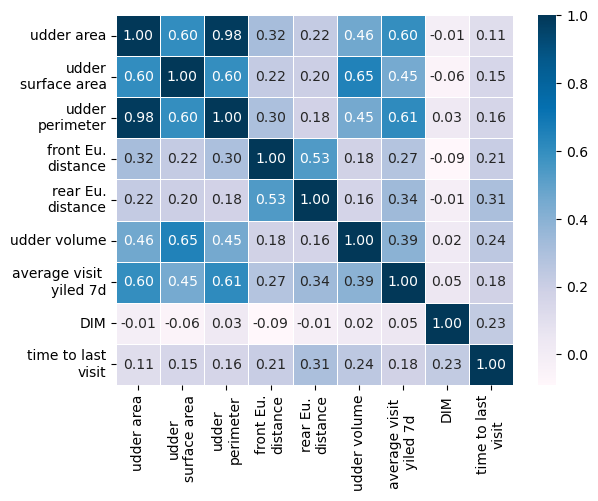

In [58]:
cmap = sns.color_palette(palette='PuBu', as_cmap = True)
sns.heatmap(corr2,annot=True,fmt=".2f", linewidth=.5,  cmap= cmap)
plt.savefig(os.path.join(plot_dir, "corr_mat.png"),bbox_inches='tight')
plt.show()